### king country 주택 데이터셋(2014~2015)

- 분석 목표 : grade 예측

- 집의 건설 연도, 침실개수, 방 넓이등의 데이터를 활용한 다중 회귀 사용

#### 성능 측정 지표 선택

- 회귀 문제의 성능 지표는 보통 **평균 제곱근 오차(RMSE(root mean square error)** 사용<br>
> 오차가 커질수록 rmse 값은 더 커지며 커질수록 오류가 많음

- 이상치로 보이는 구역이 많을 경우 **평균 절대 오차(MAE(mean absolute error)**도 사용

- 두 방법 모두 예측값의 벡터와 타겟의 벡터 사이의 거리를 재는 방법

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [59]:
kc_country = pd.read_csv('D:\Portfolio\hands on machine learning dataset\kc_house_data.csv')

In [60]:
kc_country.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.1 데이터 탐색
- 1. 데이터 수 확인<br>
- 2. 결측값 확인


In [61]:
# 데이터셋 행수,컬럼수 확인
kc_country.shape

(21613, 21)

In [62]:
# 21613개의 관측값 확인
kc_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### 데이터 설명

**ID** : unique id<br>
**date** : date when the house were sold<br>
**price** : the price of the house<br>
**bedrooms** : number of bedrooms<br>
**bathrooms** : number of bathrooms<br>
**sqft_living** : square footage of living area<br>
**sqft_lot** : square footage of total land space<br>
**floors** : numbers of floors<br>
**waterfront** : explain whether the house faces the waterfront or not<br>
**view** : levels of view the house has in 1 - 4<br>
**condition** : the condition of the house<br>
**grade**<br>
**sqft_above** : square footage of a house that is above the ground (main floor + upper)<br>
**sqft_basement** : square footage of a house below the ground<br>
**yr_built** : the year when the house were built<br>
**yr_renovated** : the year when the house were renovated<br>
**zipcode** : zipcode area of the house<br>
**lat** : latitude<br>
**long** ; longitude<br>
**sqft_living15**<br>
**sqft_lot15**

In [63]:
# 데이터내의 결측값 확인
# 데이터 내의 결측값은 없다.
kc_country.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [64]:
# 변수값 summarise
kc_country.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [65]:
kc_country.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


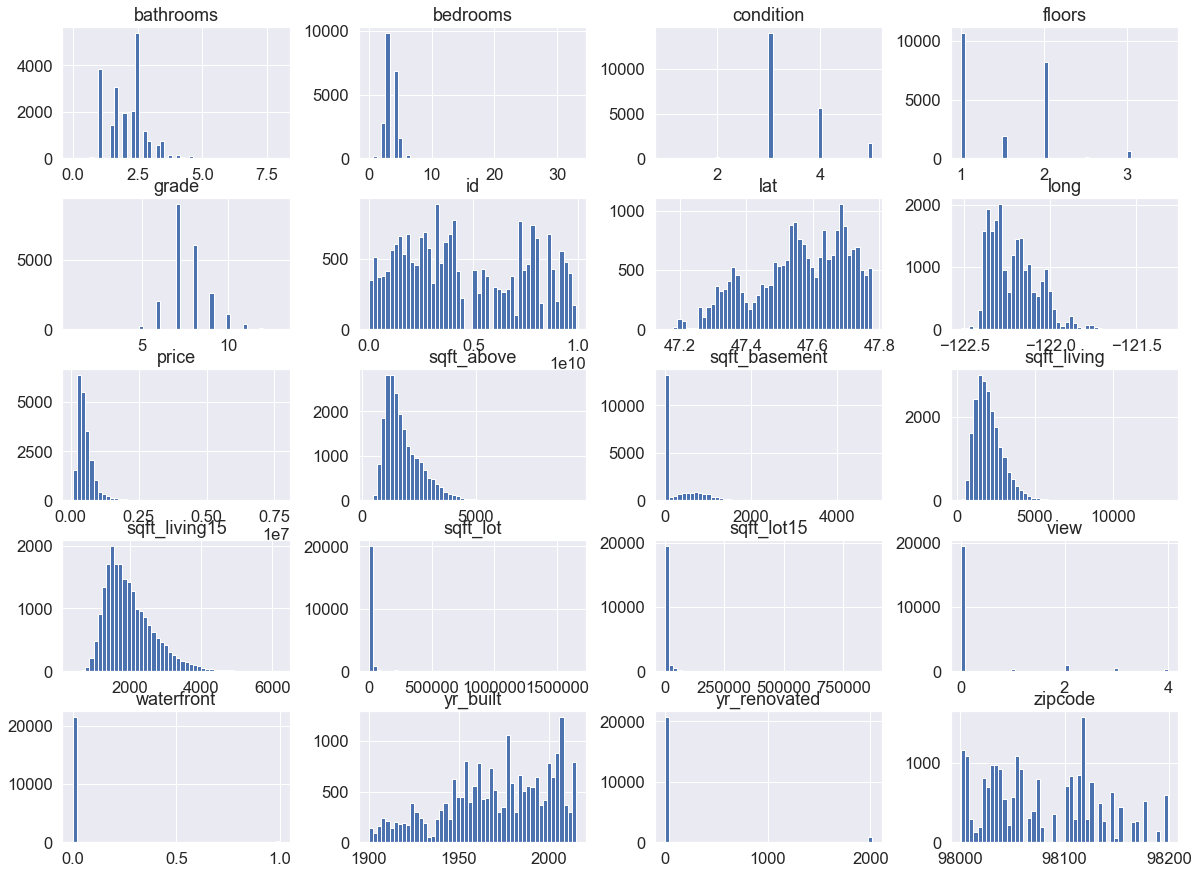

In [66]:
# 히스토그램
kc_country.hist(bins = 50, figsize = (20,15))
plt.show()

view,waterfront의 0이 아닌 빈도수가 굉장히 적다.

In [67]:
print("집이 보이는 수준 : \n", kc_country.view.value_counts())
print("해안가 방향을 바라보고 있는 집 : \n",kc_country.waterfront.value_counts())

집이 보이는 수준 : 
 0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
해안가 방향을 바라보고 있는 집 : 
 0    21450
1      163
Name: waterfront, dtype: int64


### 1.1.2 상관계수 파악

In [68]:
kc_country.corr = kc_country.corr()

In [69]:
kc_country.corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


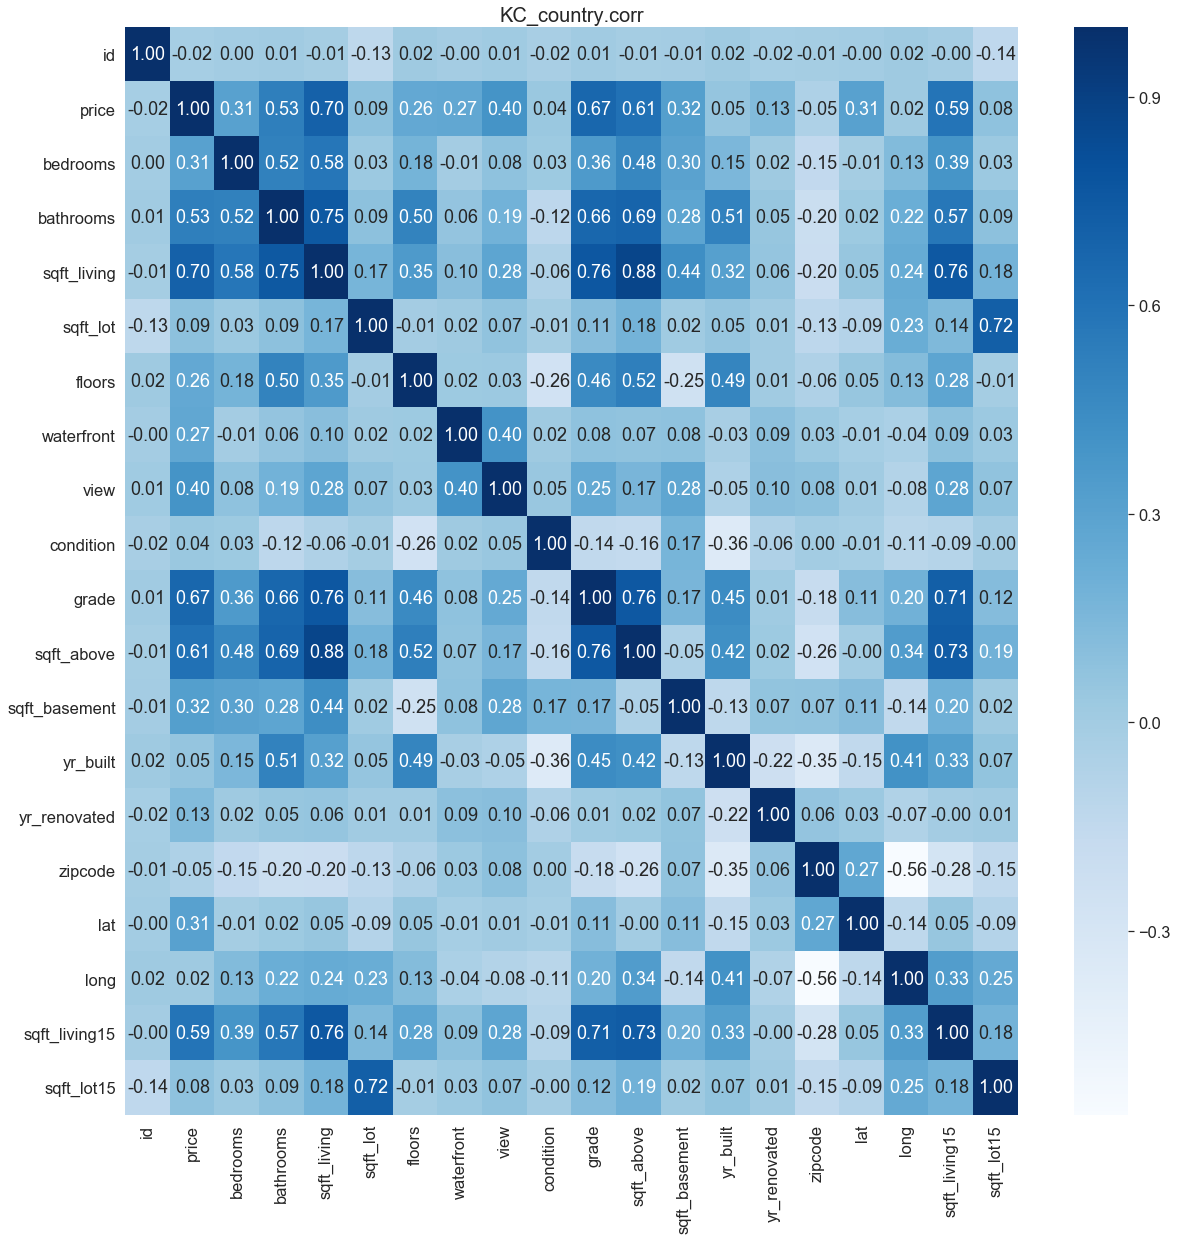

In [70]:
sns.set(font_scale = 1.5)
plt.figure(figsize = (20,20))
sns.heatmap(kc_country.corr,annot = True,fmt = '.2f', cmap = 'Blues')
plt.title('KC_country.corr', fontsize = 20)
plt.show()

grade와 0.5이상의 상관관계를 가진 변수<br>
화장실 개수, 거실 면적, 등급, 집넓이

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
kc_country = kc_country[['id','price','date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade']]

In [73]:
data = kc_country.iloc[:,:-1]
target = kc_country.iloc[:,-1:]

In [74]:
data.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,20150225T000000,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [75]:
target.head()

,grade
0,7
1,7
2,6
3,7
4,8


In [76]:
X_train,X_test,y_train,y_test = train_test_split(data,target)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 20)
(5404, 20)
(16209, 1)
(5404, 1)


In [78]:
X_train.head()

,id,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11354,1421069117,240000.0,20150417T000000,3,1.5,1460,13503,1.0,0,0,4,1460,0,1977,0,98010,47.3119,-122.015,1460,13394
3970,4438000165,122000.0,20150420T000000,2,1.0,730,6728,1.0,0,0,3,730,0,1953,0,98148,47.4275,-122.324,1170,7034
6356,3751605432,239950.0,20140513T000000,3,1.0,1900,33888,1.5,0,0,4,1900,0,1942,0,98001,47.2738,-122.271,1430,19200
20823,7582700075,1485000.0,20141002T000000,4,3.5,3930,6120,2.0,0,0,3,3310,620,2007,0,98105,47.6646,-122.280,3390,6120
14882,8679400130,353000.0,20150506T000000,4,1.5,1100,9600,1.0,0,0,4,1100,0,1960,0,98033,47.7000,-122.175,1100,9630


In [79]:
kc_country_select = kc_country[['price','bathrooms','sqft_above','grade']]
kc_country_select.head()

,price,bathrooms,sqft_above,grade
0,221900.0,1.00,1180,7
1,538000.0,2.25,2170,7
2,180000.0,1.00,770,6
3,604000.0,3.00,1050,7
4,510000.0,2.00,1680,8


In [80]:
data1 = kc_country_select.iloc[:,:-1]
target1 = kc_country_select.iloc[:,-1:]

In [81]:
data1.head()

,price,bathrooms,sqft_above
0,221900.0,1.00,1180
1,538000.0,2.25,2170
2,180000.0,1.00,770
3,604000.0,3.00,1050
4,510000.0,2.00,1680


In [82]:
target1.head()

,grade
0,7
1,7
2,6
3,7
4,8


In [83]:
data1['price'] = np.log(data1['price'])

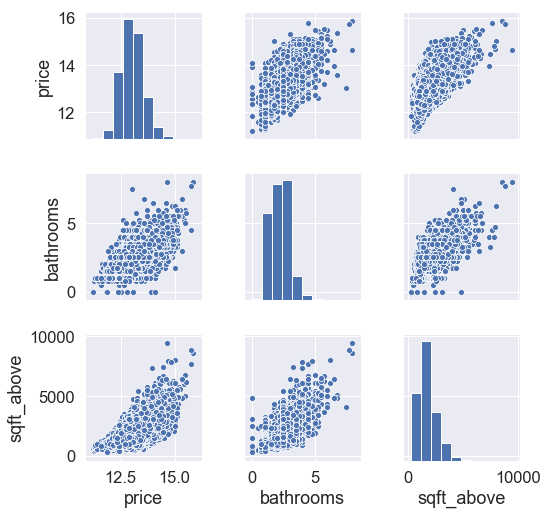

In [84]:
sns.pairplot(data1)
plt.show()

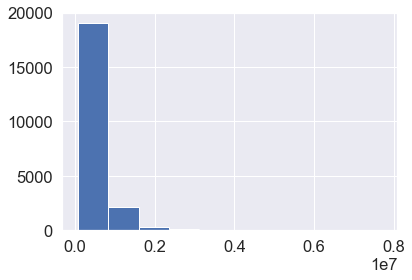

In [85]:
# price 변수 log 변환 전
plt.hist(kc_country['price'])
plt.show()

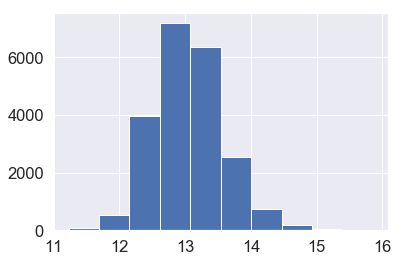

In [86]:
# price 변수 log 변환 후
plt.hist(np.log(kc_country['price']))
plt.show()

### feature scaling

standard scaler 사용 - > (x - x의 평균값) / (x의 표준편차)<br>
- 각 변수의 평균을 0, 분산을 1로 변경

- 이상치가 있을시 평균과 표준편차에 영향을 끼침

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
scaler.fit(data1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
data1_scaled = scaler.transform(data1)

In [90]:
data1_scaled

array([[-1.40093709, -1.44746357, -0.73470764],
       [ 0.28062405,  0.1756067 ,  0.46084084],
       [-1.79828088, -1.44746357, -1.22983377],
       ...,
       [-0.27219645, -1.77207762, -0.92792759],
       [-0.28214334,  0.50022075, -0.22750526],
       [-0.67639105, -1.77207762, -0.92792759]])

In [91]:
X_train,X_test,y_train,y_test = train_test_split(data1_scaled,target1)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16209, 3)
(5404, 3)
(16209, 1)
(5404, 1)


### LinearRegression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
# LinearRegression 모델 적용
linr = LinearRegression()
linr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
# LinearRegression 모델로 예측한 결과
y_pred = linr.predict(X_test)
y_pred

array([[7.01943648],
       [8.39125152],
       [7.46340993],
       ...,
       [6.86931449],
       [6.30266959],
       [8.52825146]])

In [96]:
# r^2 score 계산
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6877567278216807

In [97]:
# rmse 계산
from sklearn.metrics import mean_squared_error
model_mse = mean_squared_error(y_test,y_pred)
model_mse
model_rmse = np.sqrt(model_mse)
print("model_rmse 값 : {}".format(model_rmse))  

model_rmse 값 : 0.6499620343821345


LinearRegression모델의 rmse(예측오차)가 0.64로 낮은 수치를 달성했다.

In [98]:
df = pd.DataFrame({"y_test" : y_test['grade'],"y_pred" : y_pred.flatten()}).reset_index(drop = True)
df.head()

,y_test,y_pred
0,6,7.019436
1,9,8.391252
2,8,7.463410
3,8,8.426851
4,7,7.201234


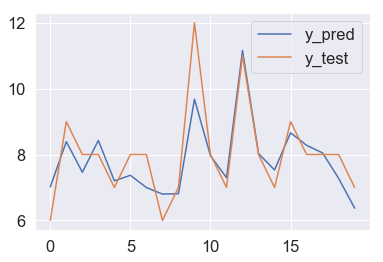

In [99]:
# 예측값과 실제 test값 비교
plt.plot(df['y_pred'][:20],label = "y_pred")
plt.plot(df['y_test'][:20], label = "y_test")
plt.legend()
plt.show()

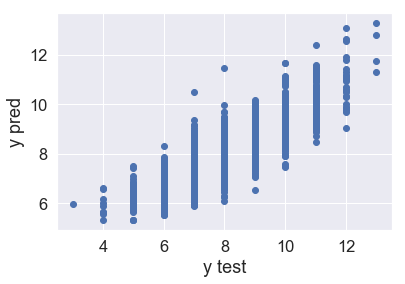

In [100]:
plt.scatter(y_test,y_pred)
plt.xlabel("y test")
plt.ylabel("y pred")
plt.show()

### DecisionTreeRegressor


In [101]:
# 모델 적용
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [102]:
# DecisionTreeRegressor로 예측한 결과
tree_predict = tree_reg.predict(X_test)
tree_predict

array([7., 8., 8., ..., 7., 6., 9.])

In [103]:
# mse 계산
tree_mse = mean_squared_error(y_test,tree_predict)
tree_mse

0.77351139073937

In [104]:
# rmse 계산
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.8794949634531002

In [105]:
df2 = pd.DataFrame({"y_test" : y_test['grade'], "y_pred" : tree_predict}).reset_index(drop = True)
df2.head()

,y_test,y_pred
0,6,7.0
1,9,8.0
2,8,8.0
3,8,8.0
4,7,7.0


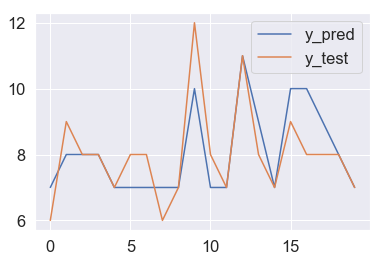

In [106]:
# tree_regression 예측값과 실제 test값 비교
plt.plot(df2.y_pred[:20],label = 'y_pred')
plt.plot(df2.y_test[:20],label = 'y_test')
plt.legend()
plt.show()

In [107]:
# 결정트리 모델 평가
# 교차검증(cross validation) 사용
from sklearn.model_selection import cross_val_score
# (진행한 학습모델, 데이터셋, 데이터셋의 레이블, 평가방식, 폴드의 개수)
scores = cross_val_score(tree_reg,data1,target1, scoring = "neg_mean_squared_error", cv = 10)

In [108]:
def cvs_score(scores) :
    print("점수 :", scores)
    print("평균 :", scores.mean())
    print("표준편차 :", scores.std())
    
cvs_score(scores)

점수 : [-0.84448556 -0.79523846 -0.83987306 -0.79106895 -0.75912643 -0.77362589
 -0.8095789  -0.81635303 -0.80945678 -0.93839015]
평균 : -0.8177197214575145
표준편차 : 0.04743211904110565


In [109]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([0.91895895, 0.89176144, 0.91644588, 0.88942057, 0.87127862,
       0.87956006, 0.89976602, 0.90352257, 0.89969816, 0.9687054 ])

In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linr,data1,target1, scoring = "neg_mean_squared_error", cv = 10)

In [111]:
def cvs_score(scores) :
    print("점수 :", scores)
    print("평균 :", scores.mean())
    print("표준편차 :", scores.std())
    
cvs_score(scores)

점수 : [-0.44288593 -0.41778045 -0.46031891 -0.42805994 -0.39746598 -0.42277259
 -0.42708413 -0.42906321 -0.45410615 -0.48527767]
평균 : -0.43648149554403765
표준편차 : 0.023611590416449103


In [112]:
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([0.66549675, 0.64635938, 0.67846806, 0.6542629 , 0.63044903,
       0.65020965, 0.65351674, 0.65502917, 0.67387398, 0.69661874])

### 학습 곡선

In [125]:
def plot_learning_curves(model,X, y) :
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    train_errors, test_errors = [],[]
    for m in range(1, len(X_train)) :
        model.fit(X_train[:m], y_train[:m])
        y_train_predict =  model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        test_errors.append(mean_squared_error(y_test,y_test_predict))
    plt.figure(figsize = (10,10))
    plt.plot(np.sqrt(train_errors),"r-", label = "train_set")
    plt.plot(np.sqrt(test_errors),'b-', label = "test_set")
    plt.legend()

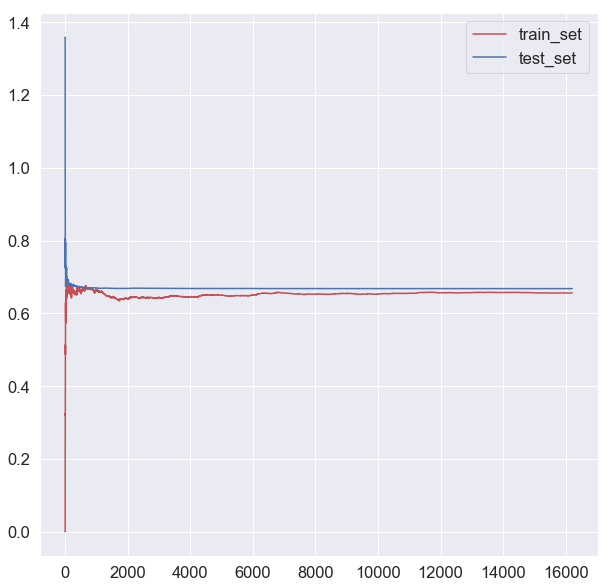

In [126]:
linr = LinearRegression()
plot_learning_curves(linr,data1,target1)